## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

Considere un péndulo forzado cuyo movimiento cumple la siguiente ecuación diferencial,

$$
\frac{d^2{\theta}}{d^2t}=-\frac{g}{l}\sin{\theta}+C\cos{\theta}\sin{\Omega t},
$$

donde $C$ y $\Omega$ son constantes.



a) Escriba la ecuación como un sistema dos ecuaciones diferenciales de primer orden.

$\frac{d\theta}{dt} = \omega$

$\frac{d\omega}{dt} = -\frac{g}{l}\sin{\theta} + C\cos{\theta}\sin{\Omega t}$

b) El metodo Runge-Kutta para ecuaciones diff de primer orden está dado por,

$$\frac{dy(t)}{dt} = f(t, y)$$

$$y_{n+1}=y_n+\frac{1}{6}(k_1 +2k_2+2k_3+k_4)$$

\begin{align}
k_1 &= hf(t_n,y_n) \\
k_2 &= hf\left( t_n + \frac{h}{2},\, y_n + \frac{k_1}{2}\right)\\
k_3 &= hf\left( t_n + \frac{h}{2},\, y_n + \frac{k_2}{2}\right)\\
k_4 &= hf(t_n + h,y_n + k_3)
\end{align}

Mientras que el método Runge-Kutta para ecuaciones diff de segundo orden está dado por,


 ![](https://raw.githubusercontent.com/diegour1/Datafiles/main/Datafiles/runge%20kutta%202nd%20order.png)

 Explique en breves palabras las ecuaciones para el segundo orden de Runge Kutta.

Estas ecuaciones nos dan la solución de la ecuación diferencial de segundo orden en términos de la ecuación diferencial de primer orden. Esto se hace para poder utilizar el método de Runge-Kutta de primer orden para resolver la ecuación diferencial de segundo orden.

c) Usando la implementación de Runge Kutta en primer orden del siguiente [notebook](https://github.com/diegour1/MetodosComputacionales2/blob/main/Notebooks/06%20-%20First_order_differential_equations.ipynb), implemente el metodo de runge-kutta de 2do orden.

Pista: Existen dos formas de implementar runge kutta 2do orden, planteando las ecuaciones anteriores de forma completa, o planteando runge-kutta de una forma vectorial donde $[d\theta/dt, d\omega/dt] = [F(\theta, \omega, t), f(\theta, \omega, t)]$

In [2]:
# runge kutta vectorial cuarto orden ed 2do orden
def rk4_vec(f, t, phi, dphi_dt, h):
    for i in range(1, len(t)):
        k1 = h * dphi_dt[i-1]
        l1 = h * f(t[i-1], phi[i-1], dphi_dt[i-1])
        k2 = h * (dphi_dt[i-1] + 0.5 * l1)
        l2 = h * f(t[i-1] + 0.5 * h, phi[i-1] + 0.5 * k1, dphi_dt[i-1] + 0.5 * l1)
        k3 = h * (dphi_dt[i-1] + 0.5 * l2)
        l3 = h * f(t[i-1] + 0.5 * h, phi[i-1] + 0.5 * k2, dphi_dt[i-1] + 0.5 * l2)
        k4 = h * (dphi_dt[i-1] + l3)
        l4 = h * f(t[i-1] + h, phi[i-1] + k3, dphi_dt[i-1] + l3)
        phi[i] = phi[i-1] + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0
        dphi_dt[i] = dphi_dt[i-1] + (l1 + 2.0 * l2 + 2.0 * l3 + l4) / 6.0
    return phi, dphi_dt

d) Resuelva la ecuación de $\theta$ en función de $t$ con $l = 10 \text{cm}$, $C = 2\text{s}^{-2}$, y $\Omega = 5 \text{s}^{-1}$. Genere un gráfico de $\theta$ en función del tiempo desde $t=0$ s hasta $t=10$ s. Las condiciones iniciales son $\theta = 0$ y $\text{d}\theta/\text{d}t = 0$.

In [3]:
l = 10 #cm
C = 2 #1/s**2
Omega = 5 #1/s
g = 9.8 #m/s**2
phi_0 = 0 #rad
dphi_dt_0 = 0 #rad/s
t_0 = 0 #s
t_f = 10 #s
h = 0.01 #s

In [4]:
def pendulo_forzado(t, phi, dphi_dt):
    return -g/l*np.sin(phi)+C*np.cos(phi)*np.sin(Omega*t) # = d^2phi/dt^2


In [5]:
t = np.arange(t_0, t_f + h, h)
phi = np.zeros(len(t))
dphi_dt = np.zeros(len(t))
phi[0] = phi_0
dphi_dt[0] = dphi_dt_0
phi, dphi_dt = rk4_vec(pendulo_forzado, t, phi, dphi_dt, h)

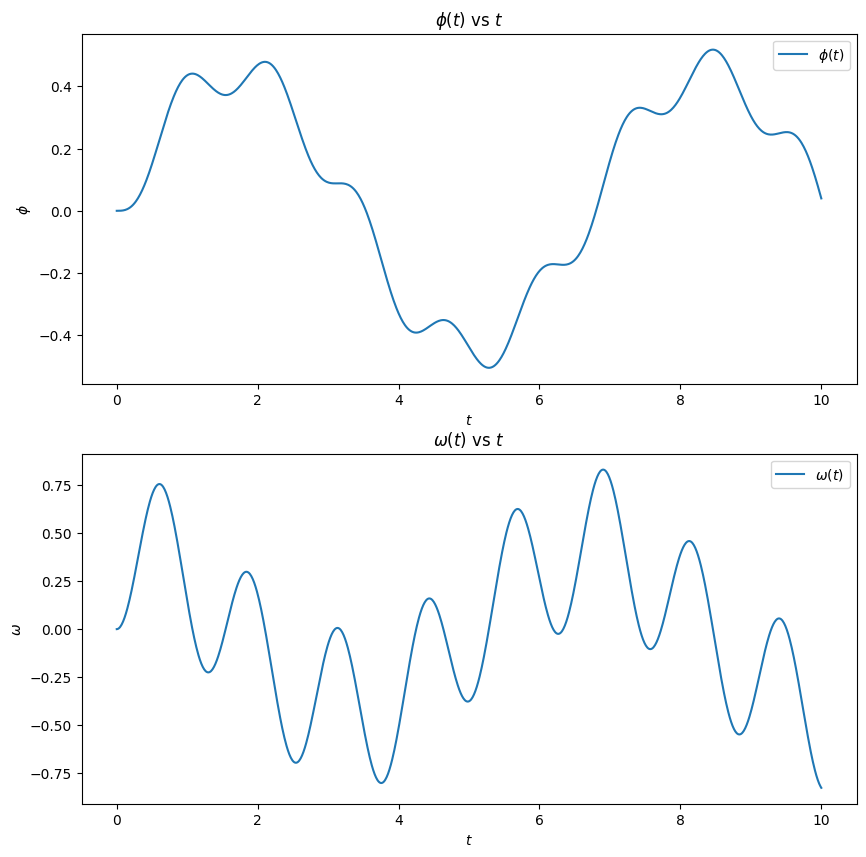

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(t, phi, label=r'$\phi(t)$')
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$\phi$')
axs[0].set_title(r'$\phi(t)$ vs $t$')
axs[0].legend()
axs[1].plot(t, dphi_dt, label=r'$\omega(t)$')
axs[1].set_xlabel(r'$t$')
axs[1].set_ylabel(r'$\omega$')
axs[1].set_title(r'$\omega(t)$ vs $t$')
axs[1].legend()
plt.show()